<a href="https://colab.research.google.com/github/Andyzxm/GEOG_520_open_source_method/blob/main/A9_Xinming_Andy_Zhang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Task 1 : Reshape the data so that the year, month, and temperature measurements are
#presented in three columns. In other words, reshape the data so that each month is not represented in a separate column

rio=pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/datasets/station_rio.csv")
rio1=rio.melt(id_vars="YEAR") 
rio2=rio1.rename(columns={'variable': 'Month','value':'Temp'})
rio3=rio2.sort_values(by = 'YEAR')
rio3.reset_index(drop= True, inplace=True)
rio3


,YEAR,Month,Temp
0,1973,JAN,27.73
1,1973,NOV,23.06
2,1973,SEP,21.46
3,1973,OCT,22.46
4,1973,JUN,22.76
...,...,...,...
559,2019,MAR,27.50
560,2019,FEB,28.05
561,2019,JAN,30.25
562,2019,NOV,999.90


In [ ]:
#Task 2: : Remove any rows that have missing data. The missing code in the datasets is 999.9
RIO=rio3[rio3.Temp!= 999.9]
RIO

,YEAR,Month,Temp
0,1973,JAN,27.73
1,1973,NOV,23.06
2,1973,SEP,21.46
3,1973,OCT,22.46
4,1973,JUN,22.76
...,...,...,...
557,2019,MAY,24.85
558,2019,APR,26.55
559,2019,MAR,27.50
560,2019,FEB,28.05


In [ ]:
#Task 3 Create a new column to recode the months into seasons. DEC, JAN,
#and FEB should be recoded to “SUMMER”; MAR, APR, and MAY, should be coded to “FALL”;JUN, JUL, 
#and AUG should be coded to “WINTER”; and SEP, OCT, and NOV should be coded to “SPRING”.
RIO["Season"] = RIO["Month"]
RIO["Season"] = RIO["Season"].replace(["DEC", "JAN", "FEB"],"Summer")
RIO["Season"] = RIO["Season"].replace(["MAR", "APR", "MAY"],"Fall")
RIO["Season"] = RIO["Season"].replace(["JUN", "JUL", "AUG"],"Winter")
RIO["Season"] = RIO["Season"].replace(["SEP", "OCT", "NOV"],"Spring")
print(RIO)

     YEAR Month   Temp  Season
0    1973   JAN  27.73  Summer
1    1973   NOV  23.06  Spring
2    1973   SEP  21.46  Spring
3    1973   OCT  22.46  Spring
4    1973   JUN  22.76  Winter
..    ...   ...    ...     ...
557  2019   MAY  24.85    Fall
558  2019   APR  26.55    Fall
559  2019   MAR  27.50    Fall
560  2019   FEB  28.05  Summer
561  2019   JAN  30.25  Summer

[517 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
#Task 4  Aggregate the data to obtain yearly median temperatures from the monthly data
RIOS=pd.DataFrame(RIO.groupby(["YEAR","Season"])["Temp"].median())
RIOS.reset_index(inplace= True)
RIOS = RIOS.rename(columns= {'index':'YEAR'})
RIOS

,YEAR,Season,Temp
0,1973,Fall,25.70
1,1973,Spring,22.46
2,1973,Summer,27.73
3,1973,Winter,22.14
4,1974,Fall,23.94
...,...,...,...
174,2018,Winter,22.91
175,2019,Fall,26.55
176,2019,Spring,24.15
177,2019,Summer,29.15


In [ ]:
#Task 5  Aggregate the data to obtain seasonal medians for each year from the monthly data
seasonal= pd.DataFrame(RIO.groupby(["YEAR", "Season"])["Temp"].median())
seasonal.reset_index(inplace=True)
seasonal

,YEAR,Season,Temp
0,1973,Fall,25.70
1,1973,Spring,22.46
2,1973,Summer,27.73
3,1973,Winter,22.14
4,1974,Fall,23.94
...,...,...,...
174,2018,Winter,22.91
175,2019,Fall,26.55
176,2019,Spring,24.15
177,2019,Summer,29.15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


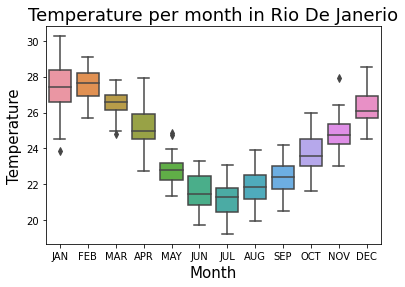

In [ ]:
#Task 6 Generate a grouped box plot to summarize the monthly data. Make sure the months are in calendar as opposed to alphabetical order.
RIO["Month"] = RIO["Month"].astype("category")
RIO["Month"] = RIO["Month"].cat.set_categories(["JAN", "FEB", "MAR", "APR", "MAY", "JUN", "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"], ordered=True)

box_plot, axs = plt.subplots(1,1)
sns.boxplot(ax = axs, x = "Month", y = "Temp", data = RIO)
axs.set_title("Temperature per month in Rio De Janerio", fontsize = 18)
axs.set_xlabel("Month", fontsize = 15)
axs.set_ylabel("Temperature", fontsize = 15)
plt.show(box_plot)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


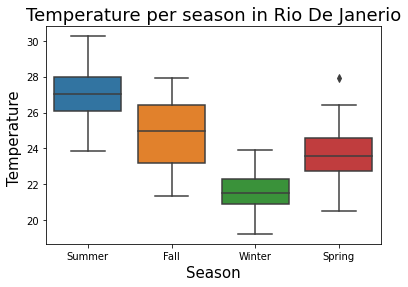

In [ ]:
#Task 7 Generate a grouped box plot to summarize the seasonal data. Make sure the seasons are in calendar order as opposed to alphabetical order.
RIO["Season"] = RIO["Season"].astype("category")
RIO["Season"] = RIO["Season"].cat.set_categories(["Summer", "Fall", "Winter", "Spring"], ordered=True)

box_plot, axs = plt.subplots(1,1)
sns.boxplot(ax = axs, x = "Season", y = "Temp", data = RIO)
axs.set_title("Temperature per season in Rio De Janerio", fontsize = 18)
axs.set_xlabel("Season", fontsize = 15)
axs.set_ylabel("Temperature ", fontsize = 15)
plt.show(box_plot)

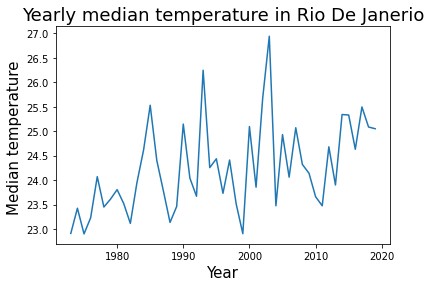

In [ ]:
#Task 8 Create a line graph or time series of yearly median temperature.
median  = pd.DataFrame(RIO.groupby("YEAR")["Temp"].median())
median.reset_index(inplace=True)

line_plot, axs = plt.subplots(1,1)
sns.lineplot(ax = axs, x = "YEAR", y = "Temp", data = median)
axs.set_title("Yearly median temperature in Rio De Janerio", fontsize = 18)
axs.set_xlabel("Year", fontsize = 15)
axs.set_ylabel("Median temperature ", fontsize = 15)
plt.show(line_plot)

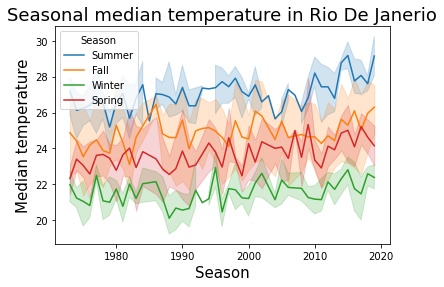

In [ ]:
#Task 9Create a line graph or time series of seasonal median temperatures where each line represents a different time series for each season.
season2  = pd.DataFrame(RIO.groupby(["YEAR", "Season"])["Temp"].median())
season2.reset_index(inplace=True)

line_plot, axs = plt.subplots(1,1)
sns.lineplot(ax = axs, x = "YEAR", y = "Temp", hue = "Season", data = RIO)
axs.set_title("Seasonal median temperature in Rio De Janerio", fontsize = 18)
axs.set_xlabel("Season", fontsize = 15)
axs.set_ylabel("Median temperature", fontsize = 15)
plt.show(line_plot)

Task 10: Summarize your results in a paragraph. Discuss both the seasonal central tendency and seasonal variability in the data. Do these data suggest a warming trend in the city over the decades included?

Answer: 
The overall trend of the yearly temperature does have a slowly upward tendency, which indicates that the warming trend does exist especially if we look at the time series graph from the 1980s to 2020, but the tempretures in years between 1980 and 2020 bounces a lot. Similarly, seasonal temperature trends also bounce drastically throughout the years, but the seasonal central tendency kind of remains the same with only a little upward warming tendency. However, the winter season roughly remains the same and the tendency bounced back to the 1980s level in 2020. I believe the overall warming trend does exist in Rio De Janerio, even though it varies a lot throughout the years and drops back to lower temperatures, we can still see the slowly upward warming trends in Spring, Summer, and Fall seasons. 

In [ ]:
#Task 11 Aggregate the county-level data to obtain the total cumulative number of cases in the state per day.
covid=pd.read_csv("/content/drive/MyDrive/GEOG520_python_data/datasets/datasets/us_counties_covid19_daily.csv")

covid.groupby(["date", "state"])["cases"].sum()

date        state        
2020-01-21  Washington            1
2020-01-22  Washington            1
2020-01-23  Washington            1
2020-01-24  Illinois              1
            Washington            1
                              ...  
2020-12-05  Virginia         251173
            Washington       184079
            West Virginia     53572
            Wisconsin        437918
            Wyoming           35941
Name: cases, Length: 15304, dtype: int64

In [ ]:
#Task 12 Aggregate the county-level data to obtain the total cumulative cases for the entire United states per day.
UScovid=covid.groupby("date")["cases"].sum()
UScovid

date
2020-01-21           1
2020-01-22           1
2020-01-23           1
2020-01-24           2
2020-01-25           3
                ...   
2020-12-01    13799415
2020-12-02    13999749
2020-12-03    14217106
2020-12-04    14446349
2020-12-05    14652044
Name: cases, Length: 320, dtype: int64

In [ ]:
#Task 13 From the data aggregated by state per day, extract out only the records for New York, North Dakota, and Washington.
Threestates=covid.query('(state == "New York") | (state == "North Dakota") | (state == "Washington")')
Threestates

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
7,2020-01-25,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800282,2020-12-05,Wahkiakum,Washington,53069.0,38,0.0
800283,2020-12-05,Walla Walla,Washington,53071.0,2416,31.0
800284,2020-12-05,Whatcom,Washington,53073.0,2637,66.0
800285,2020-12-05,Whitman,Washington,53075.0,2443,24.0


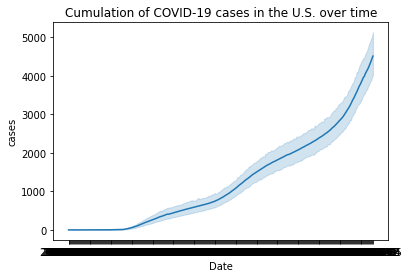

In [ ]:
#Task 14 Create a time series graph of cumulative cases for the entire United States over the provided time period.
Time=sns.lineplot(x = "date", y = "cases", data = covid)
Time.set(xlabel ="Date", ylabel = "cases", title = "Cumulation of COVID-19 cases in the U.S. over time")
plt.show(Time)

AxesSubplot(0.125,0.125;0.775x0.755)


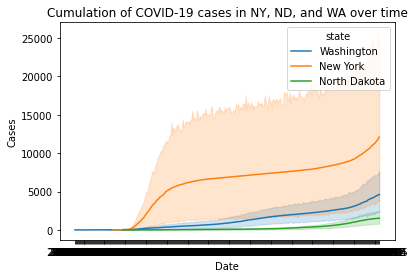

In [ ]:
#Task 15 Create a time series graph of cumulative cases for the three selected states with three separate lines to differentiate the states
time_series = sns.lineplot( x = "date", y = "cases", hue = "state", data = Threestates)
time_series.set(xlabel ="Date", ylabel = "Cases", title = "Cumulation of COVID-19 cases in NY, ND, and WA over time")
print(time_series)

Task 16 
Write a paragraph to compare the three states that were graphed in regards to when COVID-19 became prominent and how fast the number of cases grew

Answer: 
First of all I believe this graph shows a really accurate covid growth simply based on the population factor. New York as one of the most populated states in the U.S could really impact how fast covid spread due to its high population density. As the covid cases spread at the beginning of the pandemic all three states had similar growth, but once the covid spreading broke the point of control, then we can clearly see the enormous cases growth in NY compared to the other two. Washington State as another big state also hit a significant growth following NY, while the less populated North Dakota had the least amount of impacts from this population driven virus. 
